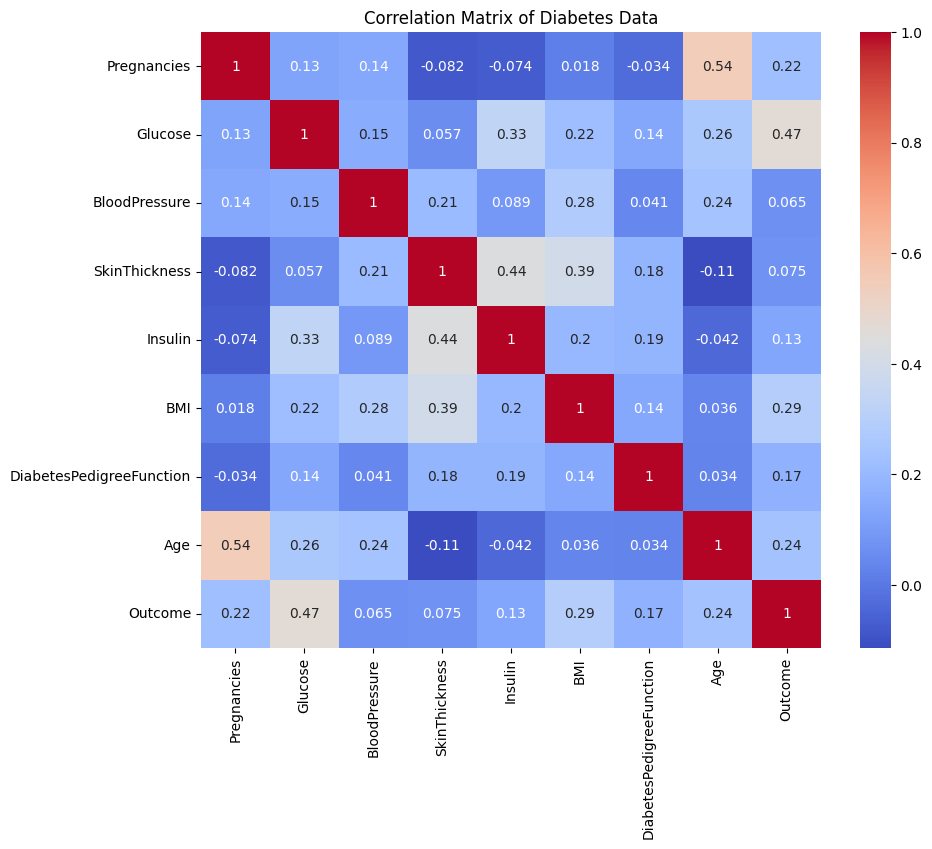

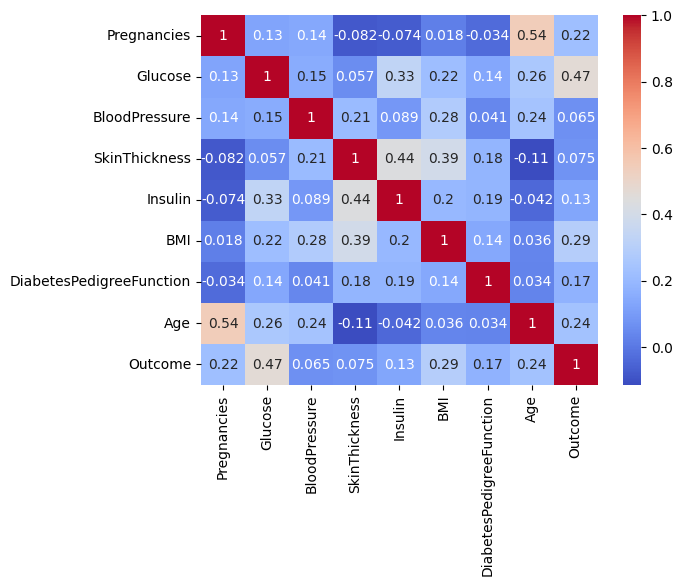

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1-score: 0.6607142857142857


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')

corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Diabetes Data')
plt.show()

correlations = data.corr()

high_corr_pairs = correlations[(correlations > 0.8) & (correlations < 1)]

sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features_to_remove = set(high_corr_pairs.index)

X_data = data.drop('Outcome', axis=1)
y_data = data['Outcome']

scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_predicted = log_reg_model.predict(X_test)

accuracy_val = accuracy_score(y_test, y_predicted)
precision_val = precision_score(y_test, y_predicted)
recall_val = recall_score(y_test, y_predicted)
f1_val = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1-score:", f1_val)
